In [23]:
import sys
import argparse
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
debuggers = ['tarantula','crosstab','barinel']


def readJson(jsonFile):
    try:
        with open('testResults/' + jsonFile) as json_data:
            return json.load(json_data)
    except FileNotFoundError:
        print(
            'Error: Could not open JSON result from coverage'
        )
        sys.exit(2)



def start():
    directory = "testResults"
    directoryList = sorted(os.listdir(directory), key=lambda s: s[8:])
    dfTemp = {}
    tempList = []
    crosstab_threshold = 0
    # Initialize Dataframe
    for d in debuggers:
        dfTemp[d] = []
    for f in directoryList:
        resultFile = readJson(str(f))
        debugger = f.split(".")[0].split("_")[2]
        coverage_matrix = resultFile['coverage_matrix']
        dangerStatement = 0
        lineNumber = len(coverage_matrix)
        for result in coverage_matrix:
            if result['suspiciousness'] >= Threshold[debugger]:
                dangerStatement += 1
        metric = dangerStatement / lineNumber
        dfTemp[debugger].append(metric)
    df = pd.DataFrame(dfTemp)
    
    plt.figure()
    df.plot(subplots=True, figsize=(15,15))
    df.plot(figsize=(15,15))
    print(df)


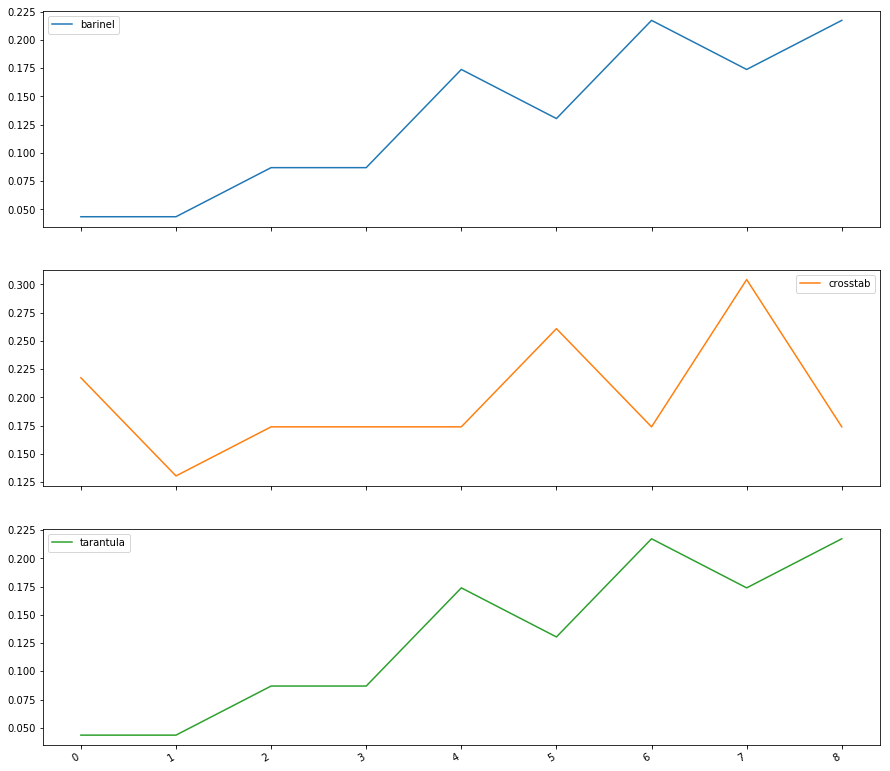

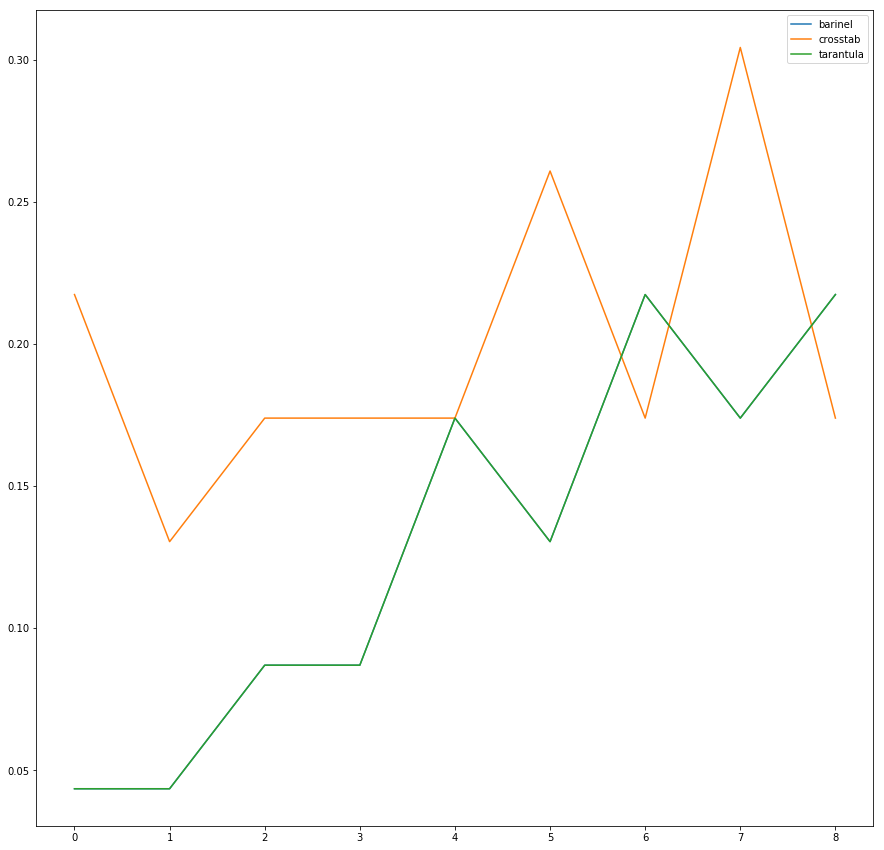

In [24]:
Threshold = {
    'tarantula': 0.7,
    'crosstab': 0.0002,
    'barinel': 1,
}
if __name__ == '__main__':
    start()